In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install plotly

  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.3.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.3.0-py3-none-any.whl (25 kB)


In [6]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 283.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 764.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 683.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67899 sha256=b5a0837ee110a37e1f97a5356d13c6dc8809d2abf58803f3cc7e038b0e60d40c
  Stored in directory: /Users/abhishek/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [7]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf #configuration file for plotly


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        
        
        '''))

In [8]:

data = pd.read_csv("/Users/abhishek/Desktop/PYTHON/Deployment/THYROID _DISEASE_ DETECTION /notebook/data/hypothyroid.csv")
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [9]:
data.shape

(3772, 30)

In [10]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [35]:
data.nunique()

age                           93
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
sick                           2
pregnant                       2
thyroid_surgery                2
I131_treatment                 2
query_hypothyroid              2
query_hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH_measured                   2
TSH                          287
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          241
T4U_measured                   2
T4U                          146
FTI_measured                   2
FTI                          234
TBG_measured                   1
TBG                            0
referral_source                5
Class                          4
dtype: int

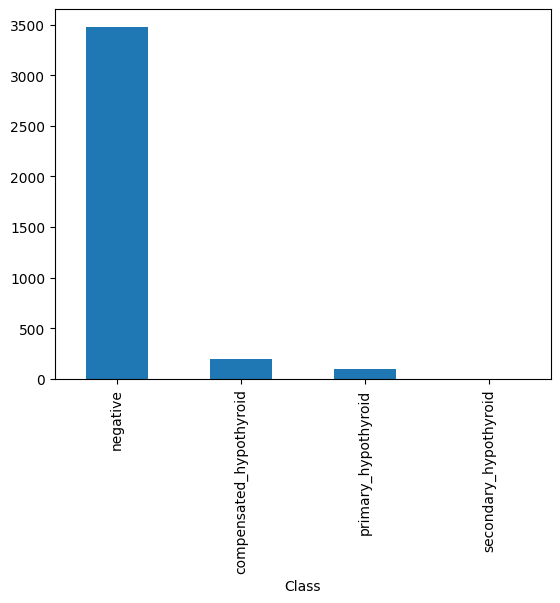

In [12]:
data["Class"].value_counts().plot(kind = "bar")
plt.show()

In [13]:
# replacing the '?' values with numpy nan

for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)

In [14]:
data["age"] = pd.to_numeric(data["age"])

In [15]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,negative


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

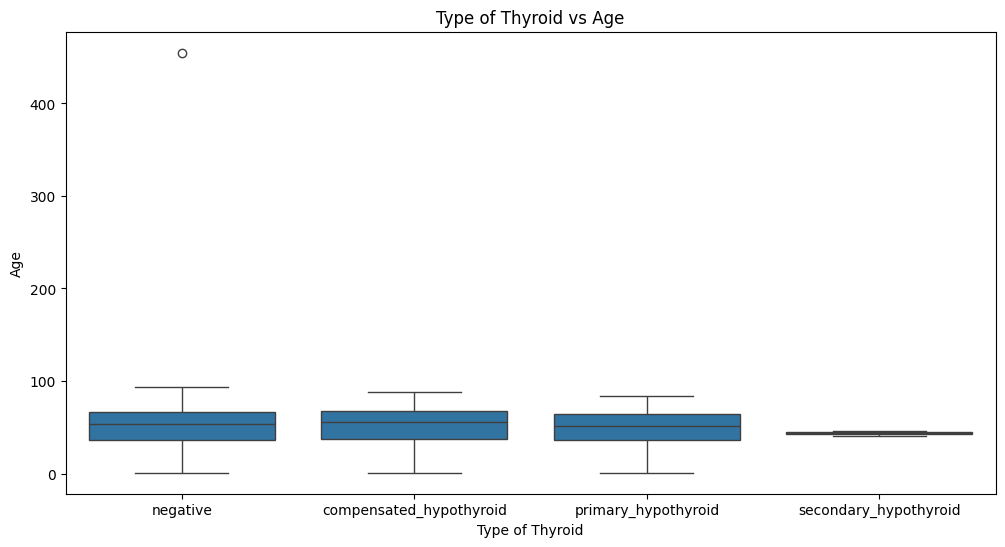

In [18]:

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "age", data = data)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

<Axes: xlabel='sex'>

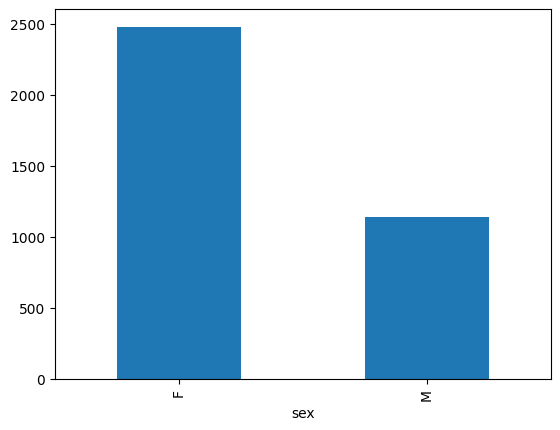

In [19]:

data["sex"].value_counts().plot(kind = "bar")
     

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

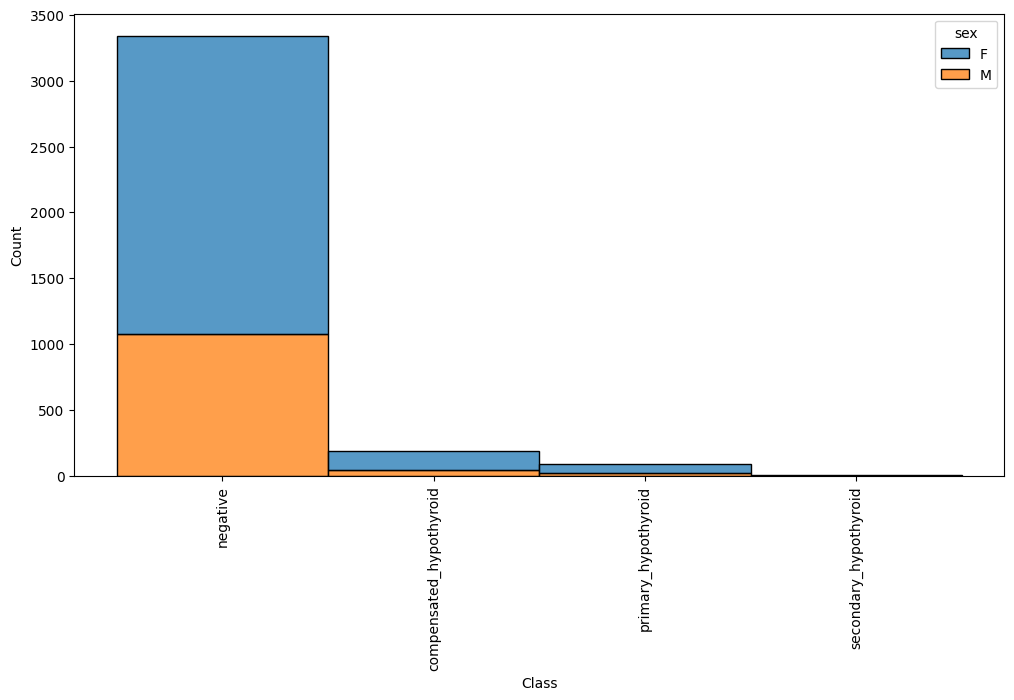

In [20]:

plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sex", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<Axes: xlabel='sick'>

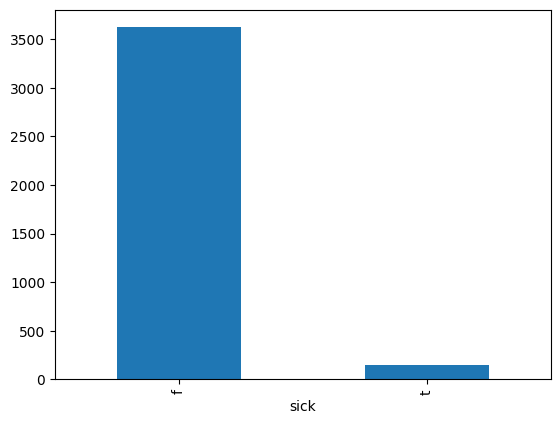

In [21]:

data["sick"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

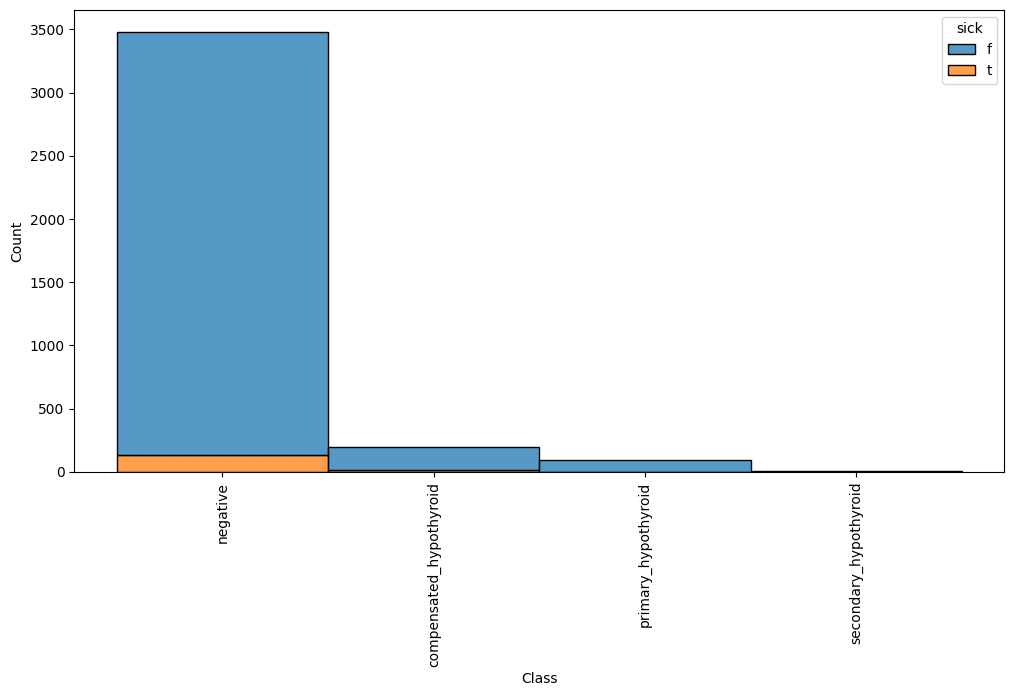

In [22]:

plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

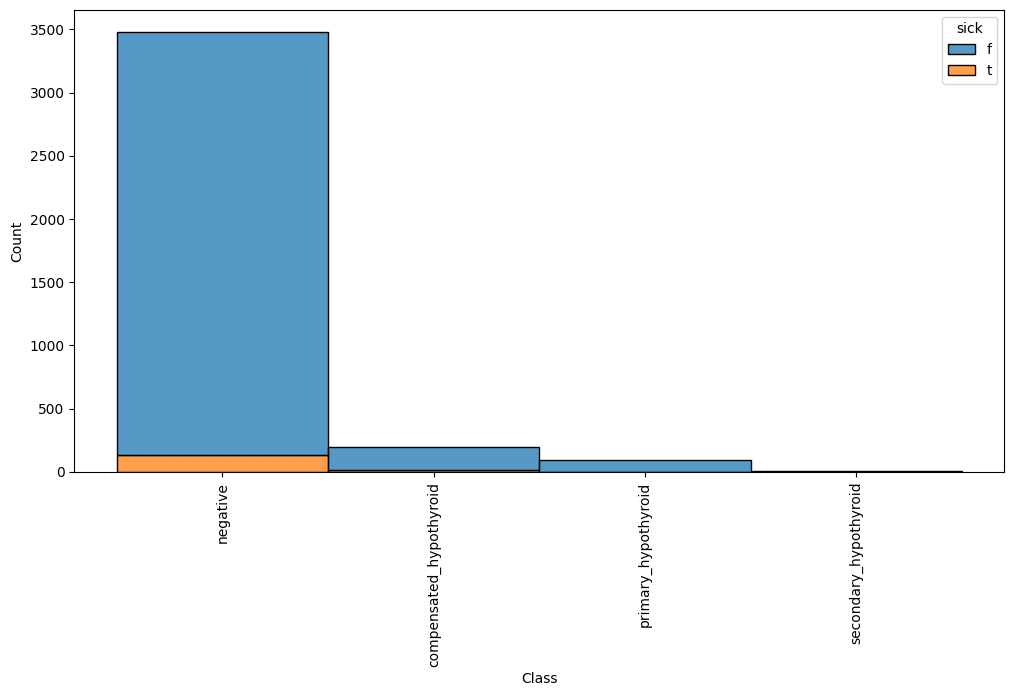

In [23]:

plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<Axes: xlabel='thyroid_surgery'>

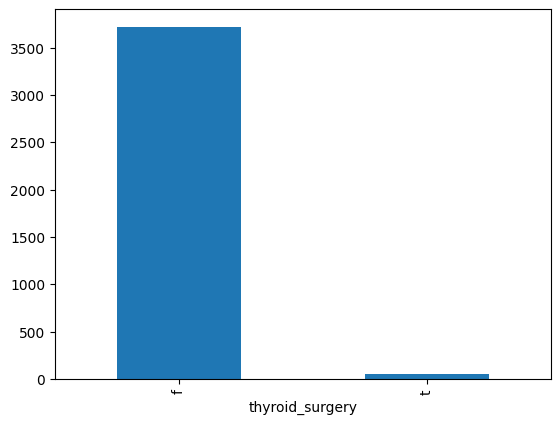

In [24]:

data["thyroid_surgery"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

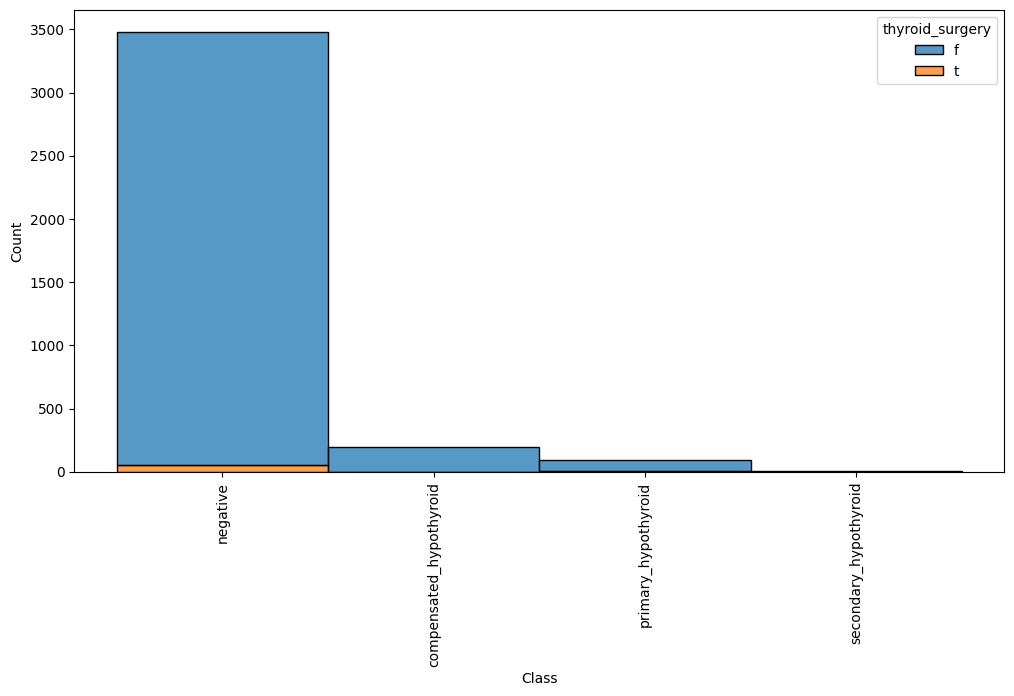

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="thyroid_surgery", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

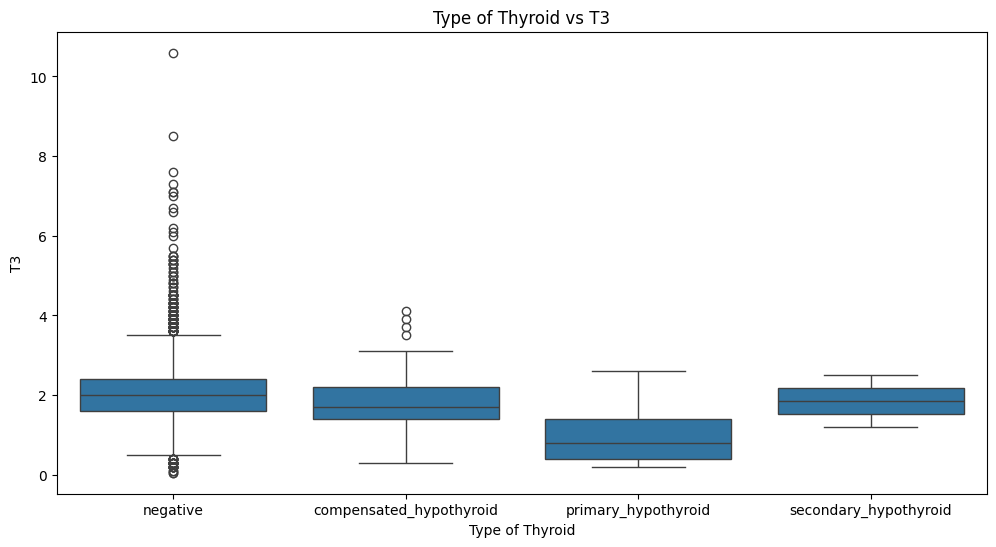

In [26]:
data['T3'] = pd.to_numeric(data['T3'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T3", data = data)
plt.title("Type of Thyroid vs T3")
plt.xlabel("Type of Thyroid")
plt.ylabel("T3")
plt.show()

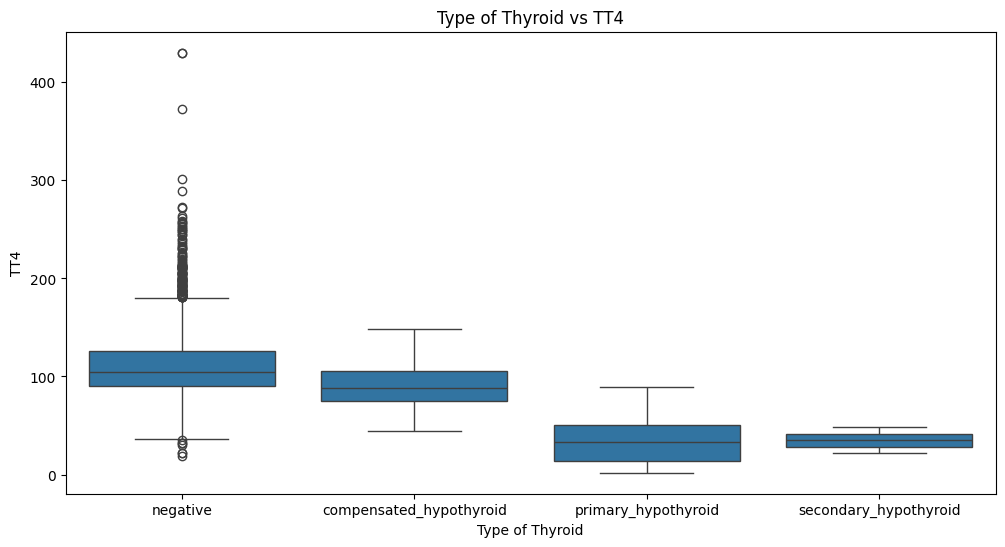

In [27]:
data['TT4'] = pd.to_numeric(data['TT4'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "TT4", data = data)
plt.title("Type of Thyroid vs TT4")
plt.xlabel("Type of Thyroid")
plt.ylabel("TT4")
plt.show()

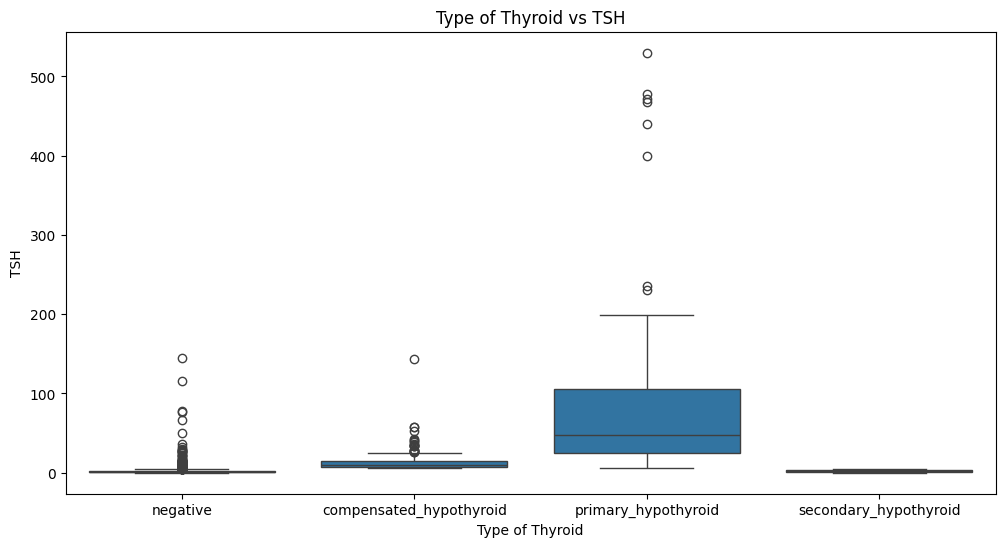

In [28]:
data['TSH'] = pd.to_numeric(data['TSH'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "TSH", data = data)
plt.title("Type of Thyroid vs TSH")
plt.xlabel("Type of Thyroid")
plt.ylabel("TSH")
plt.show()

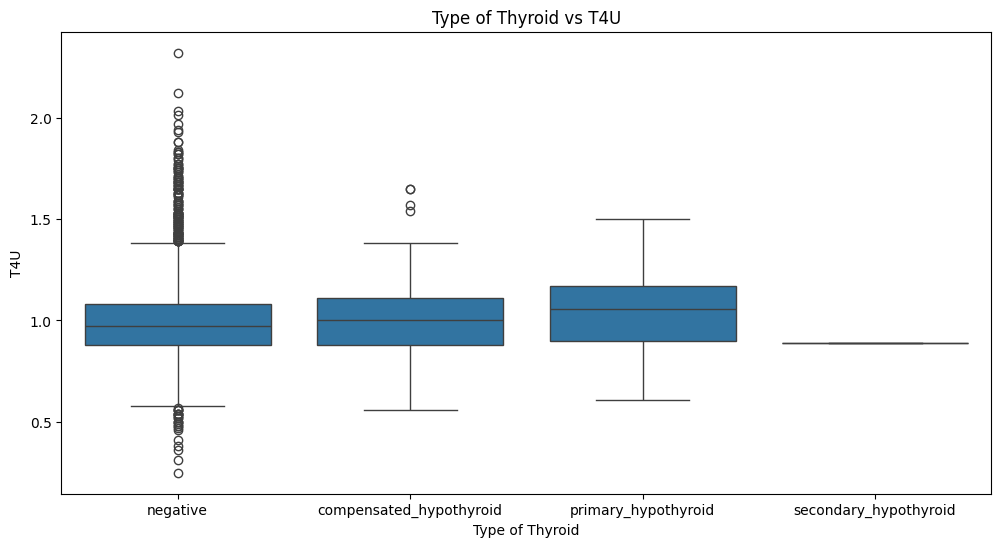

In [29]:

data['T4U'] = pd.to_numeric(data['T4U'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T4U", data = data)
plt.title("Type of Thyroid vs T4U")
plt.xlabel("Type of Thyroid")
plt.ylabel("T4U")
plt.show()

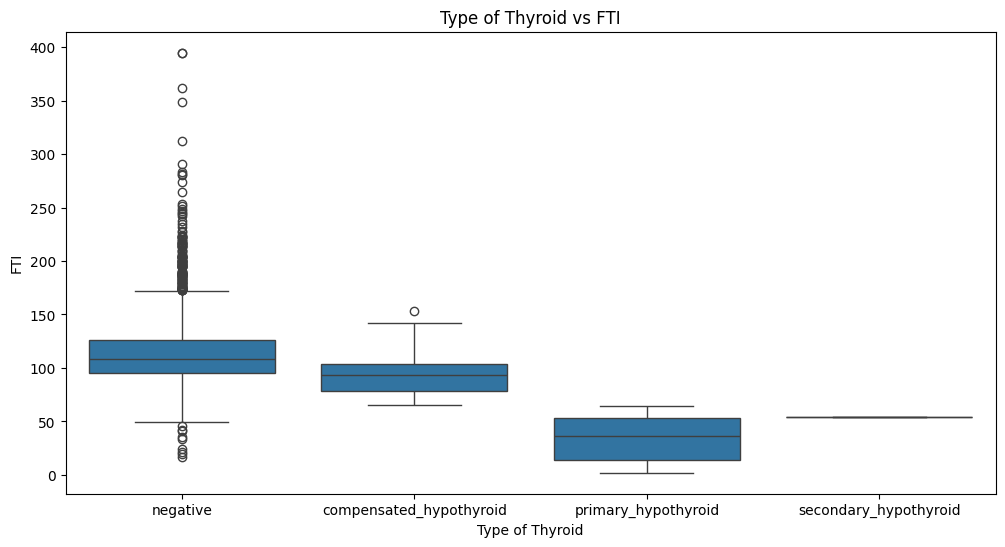

In [30]:
data['FTI'] = pd.to_numeric(data['FTI'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "FTI", data = data)
plt.title("Type of Thyroid vs FTI")
plt.xlabel("Type of Thyroid")
plt.ylabel("FTI")
plt.show()

<Axes: xlabel='tumor'>

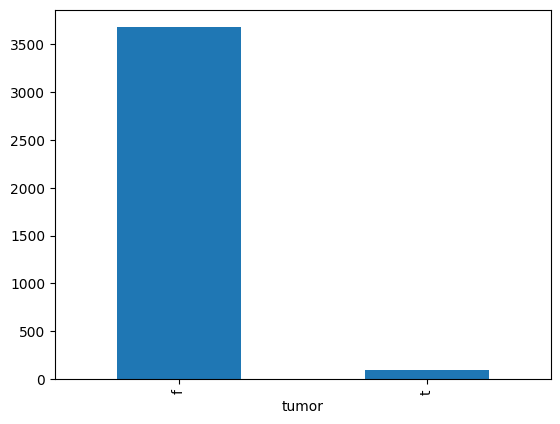

In [31]:
data["tumor"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

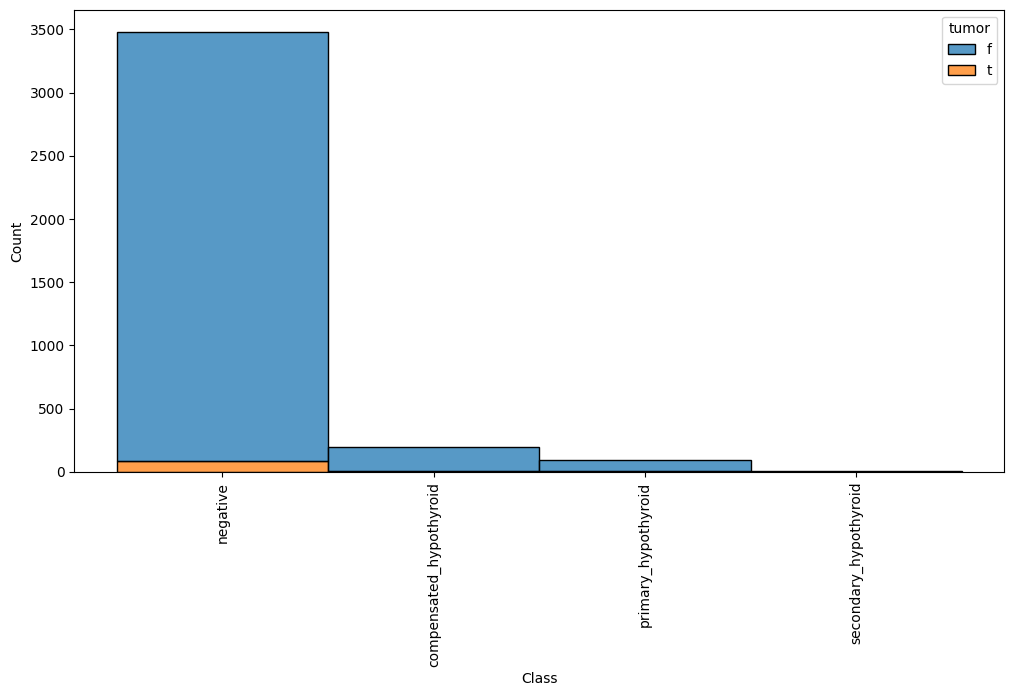

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="tumor", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<Axes: xlabel='goitre'>

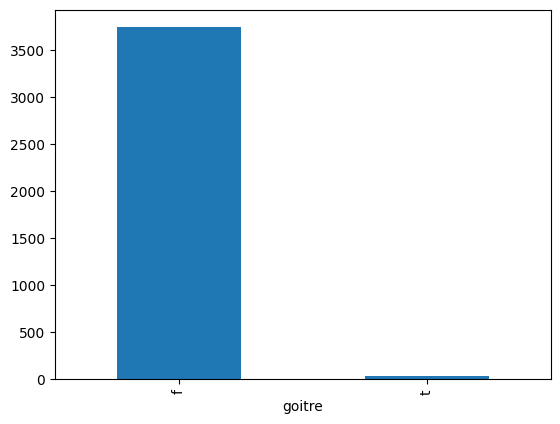

In [33]:


data["goitre"].value_counts().plot(kind = "bar")


([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'compensated_hypothyroid'),
  Text(2, 0, 'primary_hypothyroid'),
  Text(3, 0, 'secondary_hypothyroid')])

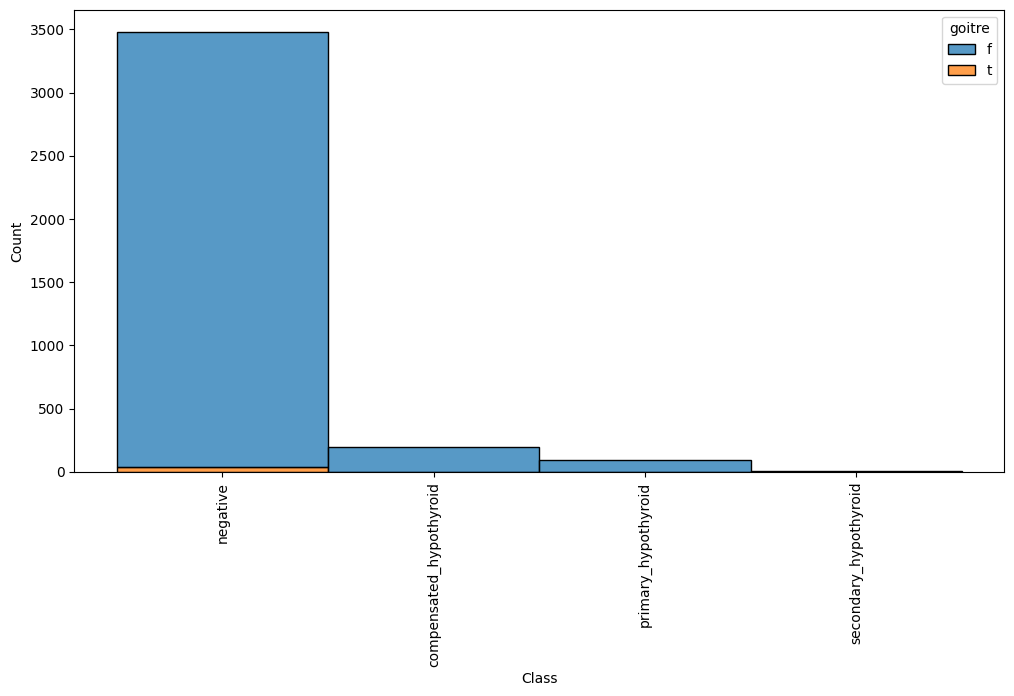

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="goitre", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")